<a href="https://colab.research.google.com/github/nilanjanmanna01/tensorflow_practice/blob/main/CNN_MNIST_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [95]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [96]:
from tensorflow.keras.datasets import mnist

In [97]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [98]:
x_train.shape

(60000, 28, 28)

In [99]:
# 60000 imgaes with 28,28 size for x_train

In [100]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

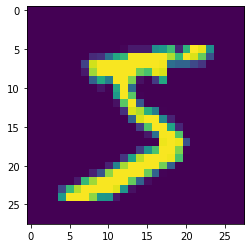

In [101]:
# Show 1 image using matplotlib imshow
plt.imshow(x_train[0])

In [102]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [103]:
# We need to classify the y_train

In [104]:
from tensorflow.keras.utils import to_categorical

In [105]:
y_example = to_categorical(y_train,num_classes=10)

In [106]:
y_example.shape

(60000, 10)

In [107]:
# Showing that the first value falls in 5 category
y_example[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [108]:
y_cat_train = to_categorical(y_train,num_classes=10)

In [109]:
y_cat_test = to_categorical(y_test,num_classes=10)

In [110]:
# We should scale the data from (0 to 255) to (0 to 1)
# We can use sklearn minmax scaler, but in this case just dividing by 255 will work
# The approach will work since any future image will also have value from 0 to 255

In [111]:
x_train = x_train/255
x_test = x_test/255

In [112]:
x_train[0].max()

1.0

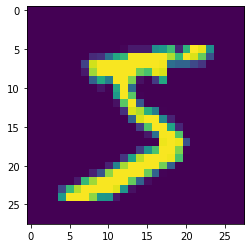

In [113]:
plt.imshow(x_train[0])

In [114]:
x_train.shape

(60000, 28, 28)

In [115]:
# We still need to add one more dimension. Since we are dealing with grey images we will have only 1 channel

In [116]:
# batch_size,width,height,color_channel
x_train = x_train.reshape(60000,28,28,1)

In [118]:
x_test.shape

(10000, 28, 28)

In [119]:
x_test = x_test.reshape(10000,28,28,1)

In [120]:
# Model creation

In [121]:
from tensorflow.keras.models import Sequential

In [122]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [123]:
model = Sequential()

# First layer is convolutional
# We didn't add any padding since we are covering all pixels using our kernel_size and strides (28/4 = 7)
model.add(Conv2D(filters=128,kernel_size=(4,4),input_shape=(28,28,1),activation='relu'))

# Pooling layer is next. We will opt for default (2,2)
model.add(MaxPool2D(pool_size=(2,2)))

# Flatten layer to flatten out the images - (28 by 28 image in a single array = 28*28 = 784)
model.add(Flatten())

# Dense layer. We usually add power of 2. We can add more than 1 dense layer
model.add(Dense(256,activation='relu'))

# Output layer (1 neuron per class for classification problem, also we will use softmax activation since it's a multi-class problem
# We have 10 possible classes - 0 to 9
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [124]:
from tensorflow.keras.callbacks import EarlyStopping

In [125]:
early_stop = EarlyStopping(monitor='val_loss',patience=1)

In [126]:
len(x_train)

60000

In [127]:
model.fit(x_train,y_cat_train,epochs=10,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 131s 70ms/step - loss: 0.2149 - accuracy: 0.9340 - val_loss: 0.0492 - val_accuracy: 0.9832
Epoch 2/10
1875/1875 [==============================] - 130s 69ms/step - loss: 0.0397 - accuracy: 0.9882 - val_loss: 0.0368 - val_accuracy: 0.9880
Epoch 3/10
1875/1875 [==============================] - 130s 69ms/step - loss: 0.0212 - accuracy: 0.9929 - val_loss: 0.0465 - val_accuracy: 0.9853


In [128]:
x_train.shape

(60000, 28, 28, 1)

In [129]:
y_cat_train.shape

(60000, 10)

In [130]:
metrics = pd.DataFrame(model.history.history)

In [131]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.107498,0.966617,0.049236,0.9832
1,0.037525,0.988650,0.036785,0.9880
2,0.022754,0.992600,0.046482,0.9853


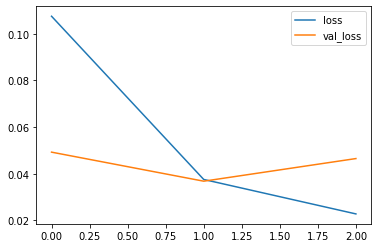

In [132]:
metrics[['loss','val_loss']].plot()

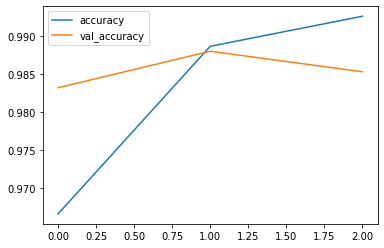

In [133]:
metrics[['accuracy','val_accuracy']].plot()

In [134]:
model.evaluate(x_test,y_cat_test,verbose=0)

[0.04648232460021973, 0.9853000044822693]

In [135]:
from sklearn.metrics import classification_report,confusion_matrix

In [136]:
predictions = (model.predict(x_test) > 0.5).astype("int32")

In [137]:
y_cat_test.shape

(10000, 10)

In [138]:
predictions

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

In [141]:
print(classification_report(y_cat_test,predictions))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      0.99      0.99      1135
           2       1.00      0.98      0.99      1032
           3       0.98      1.00      0.99      1010
           4       0.99      0.98      0.99       982
           5       0.99      0.98      0.99       892
           6       1.00      0.97      0.98       958
           7       0.99      0.98      0.99      1028
           8       0.95      0.99      0.97       974
           9       0.98      0.98      0.98      1009

   micro avg       0.99      0.98      0.99     10000
   macro avg       0.99      0.98      0.99     10000
weighted avg       0.99      0.98      0.99     10000
 samples avg       0.98      0.98      0.98     10000



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


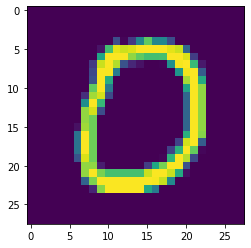

In [142]:
plt.imshow(x_test[10].reshape(28,28))

In [143]:
# How to test with an image 
# Shape should be (#image,width,height,channel)
(model.predict(x_test[10].reshape(1,28,28,1)) > 0.5).astype("int32")

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int32)

In [144]:
x_test[0].shape

(28, 28, 1)

In [145]:
x_train.max()

1.0

In [146]:
x_test.max()

1.0